In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/content/credit_card_default.csv')

In [4]:
data.shape

(30000, 25)

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [16]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [12]:
x = data[['LIMIT_BAL','EDUCATION']]
y = data['default payment next month']

In [15]:
y.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [21]:
from sklearn.metrics import  accuracy_score

knn


In [22]:

from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred_knn)
  acc_values.append(acc)


In [23]:
 acc_values

[0.6981333333333334,
 0.7656,
 0.7065333333333333,
 0.7782666666666667,
 0.7658666666666667,
 0.7794666666666666,
 0.7685333333333333,
 0.7713333333333333,
 0.7713333333333333,
 0.7713333333333333,
 0.7686666666666667,
 0.7713333333333333]

Text(0, 0.5, 'accuracy')

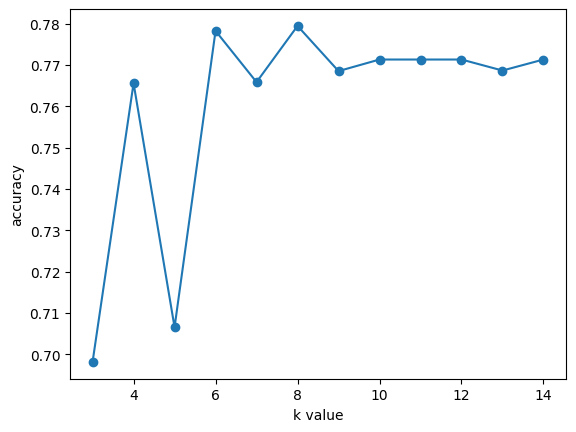

In [27]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [30]:
 classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
 classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [32]:
 y_pred = classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score

In [34]:
confusion_matrix(y_test,y_pred_knn)

array([[5736,  149],
       [1566,   49]])

In [35]:
print("Accuracy is:", accuracy_score(y_test,y_pred))
print("recall is:", recall_score(y_test,y_pred))
print("f1_score is:", f1_score(y_test,y_pred))



Accuracy is: 0.7656
recall is: 0.08111455108359134
f1_score is: 0.1297029702970297


In [37]:
print("precision is:", precision_score(y_test,y_pred))

precision is: 0.3234567901234568


In [38]:
confusion_matrix(y_test,y_pred)

array([[5611,  274],
       [1484,  131]])

boosting


In [42]:
from sklearn import metrics


AdaBoosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(x_train,y_train)
y_pred = ada_boost_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7845333333333333


GradientBoosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
grad_boost_clf.fit(x_train,y_train)
y_pred = grad_boost_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7844


xgboost

In [46]:
import xgboost as xgb
xg_boost_clf = xgb.XGBClassifier()
xg_boost_clf.fit(x_train,y_train)
y_pred = xg_boost_clf.predict(x_test)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7844


BAGGING USING SVM

In [48]:
from sklearn.svm import SVC

In [50]:
from sklearn.ensemble import BaggingClassifier

In [51]:
bagging_clf = BaggingClassifier(base_estimator = SVC(),n_estimators=100,random_state=42)

In [53]:
bagging_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=42)

In [54]:
y_pred = bagging_clf.predict(x_test)

In [55]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7846666666666666


In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7846666666666666

kfold cross validation

In [58]:
from sklearn.model_selection import cross_val_score,KFold
model = LogisticRegression()
kf = KFold(n_splits = 10)

In [59]:
for train_index,test_index in kf.split(x,y):
  print('Training index :',train_index)
  print('Testing index :',test_index)

Training index : [ 3000  3001  3002 ... 29997 29998 29999]
Testing index : [   0    1    2 ... 2997 2998 2999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [3000 3001 3002 ... 5997 5998 5999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [6000 6001 6002 ... 8997 8998 8999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [ 9000  9001  9002 ... 11997 11998 11999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [12000 12001 12002 ... 14997 14998 14999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [15000 15001 15002 ... 17997 17998 17999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [18000 18001 18002 ... 20997 20998 20999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [21000 21001 21002 ... 23997 23998 23999]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [24000 

In [60]:
score = cross_val_score(model,x,y,cv=kf)

In [61]:
print(score)

[0.77733333 0.785      0.76433333 0.77566667 0.772      0.74233333
 0.78466667 0.80866667 0.799      0.779     ]


In [62]:
print('average cross validation score =',score.mean())

average cross validation score = 0.7788


stratified cross validation

In [63]:
from sklearn.model_selection import StratifiedKFold

In [64]:
skfold = StratifiedKFold(n_splits= 10)

In [65]:
for train_index,test_index in skfold.split(x,y):
  print('Training index :',train_index)
  print('Testing index :',test_index)

Training index : [ 2993  2995  2996 ... 29997 29998 29999]
Testing index : [   0    1    2 ... 3001 3004 3005]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [2993 2995 2996 ... 6044 6045 6047]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [5983 5984 5985 ... 9030 9032 9033]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [ 8883  8886  8888 ... 12047 12048 12049]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [11794 11796 11802 ... 15067 15068 15069]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [14766 14770 14778 ... 18217 18218 18220]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [17316 17319 17323 ... 21194 21196 21197]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [20429 20437 20439 ... 24071 24072 24073]
Training index : [    0     1     2 ... 29997 29998 29999]
Testing index : [23691 

In [66]:
skfold_score = cross_val_score(model,x,y,cv=skfold)

In [67]:
skfold_score

array([0.77866667, 0.77866667, 0.77866667, 0.77866667, 0.77866667,
       0.77866667, 0.779     , 0.779     , 0.779     , 0.779     ])

In [68]:
print('Average SKfold score =',skfold_score.mean())

Average SKfold score = 0.7787999999999999


hyperparameter tuning

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

In [71]:
for val in max_depth:
  score = cross_val_score(DecisionTreeClassifier(max_depth = val),x,y,cv=kf,scoring = 'accuracy')
  print('avg score =',score.mean())

avg score = 0.7788
avg score = 0.7788
avg score = 0.7788
avg score = 0.7788
avg score = 0.7787333333333333
avg score = 0.7787
avg score = 0.7785666666666667
avg score = 0.7785
avg score = 0.7784333333333333
avg score = 0.7784333333333333


gridsearch cross validation

In [72]:
parameters = {'max_depth': [10,20,30,40,50,60,70,80,90,100],
              'criterion': ['gini','entropy'],
              'n_estimators': [50,100,200,400,600]}

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [74]:
grid_search = GridSearchCV(
              RandomForestClassifier(),
              parameters,
              cv=5,
              scoring = 'accuracy',
              n_jobs = -1

)

In [75]:
grid_result = grid_search.fit(x_train,y_train)

In [78]:
print('Best Params : ',grid_result.best_params_)
print('Best score : ',grid_result.best_score_)

Best Params :  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
Best score :  0.7767999999999999


randomized searching cv

In [79]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                   param_distributions=parameters,
                                   n_jobs = -1,
                                   n_iter = 50
                                   )

In [80]:
random_result = random_search.fit(x_train,y_train)

In [81]:
print('Best Params : ',grid_result.best_params_)
print('Best score : ',grid_result.best_score_)

Best Params :  {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
Best score :  0.7767999999999999
